# practical1:Consistency

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

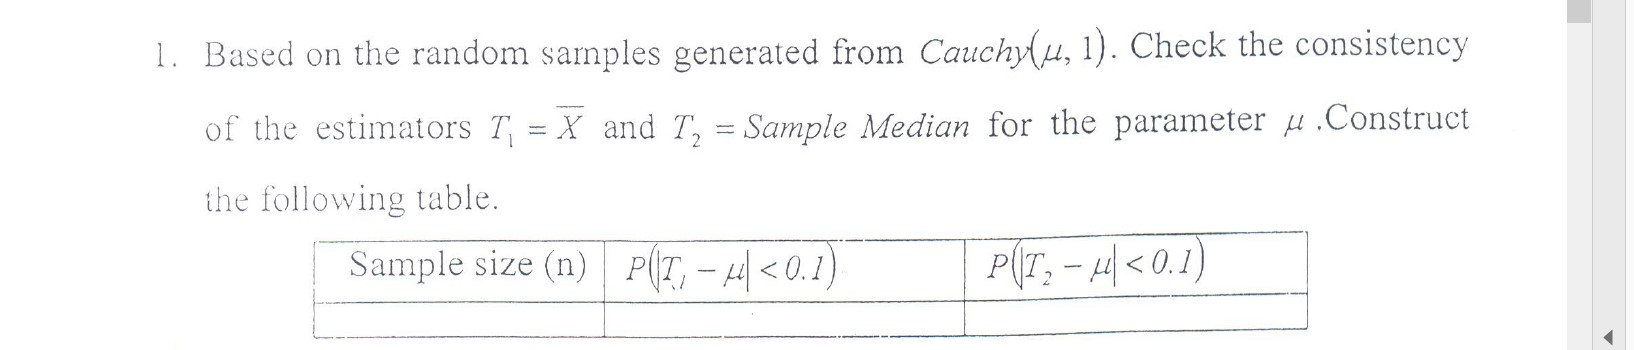

In [33]:
import scipy
from scipy.stats import cauchy
mu=3;eps=0.1
N=[25,50,100,500,1000]
p1=[]
p2=[]
for i in range(0,len(N)):
    x=cauchy.rvs(mu,1,(N[i],N[i]))
    xbar=np.mean(x,axis=1)
    Med=np.median(x,axis=1)
    p1.append(np.mean(np.abs(xbar-mu)<eps))
    p2.append(np.mean(np.abs(Med-mu)<eps))
pd.DataFrame({"sample size":N,"est_prob1":p1,"est_prob2":p2})

,sample size,est_prob1,est_prob2
0,25,0.000,0.160
1,50,0.080,0.420
2,100,0.060,0.480
3,500,0.064,0.832
4,1000,0.054,0.958


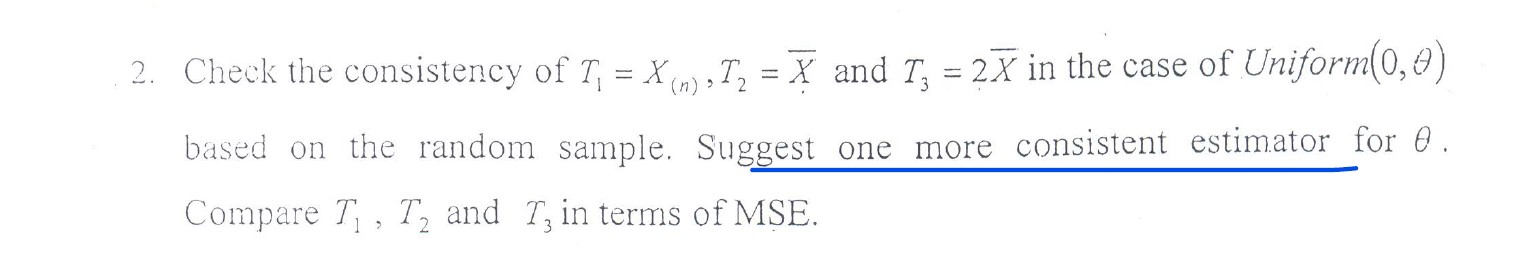

In [58]:
a=0;b=5;eps=0.02
N=[50,100,250,1000]
p1=[];mse1=[]
p2=[];mse2=[]
p3=[];mse3=[]
for i in range(0,len(N)):
    x=np.random.uniform(a,b,(N[i],N[i]))
    T1=np.mean(x,axis=1)
    T2=T1*2
    T3=np.max(x,axis=1)
    p1.append(np.mean(np.abs(T1-b)<eps))
    p2.append(np.mean(np.abs(T2-b)<eps))
    p3.append(np.mean(np.abs(T3-b)<eps))
    mse1.append(np.mean(np.square(T1-b)))
    mse2.append(np.mean(np.square(T2-b)))
    mse3.append(np.mean(np.square(T3-b)))
pd.DataFrame({"sample size":N,"esti_prob1":p1,"esti_prob2":p2,"esti_prob3":p3,
             "mseT1":mse1,"mseT2":mse2,"mseT3":mse3})
    

,sample size,esti_prob1,esti_prob2,esti_prob3,mseT1,mseT2,mseT3
0,50,0.0,0.020,0.120,6.527172,0.148530,0.026991
1,100,0.0,0.030,0.270,6.310443,0.096250,0.005235
2,250,0.0,0.084,0.648,6.279069,0.032097,0.000946
3,1000,0.0,0.178,0.982,6.248972,0.008091,0.000050


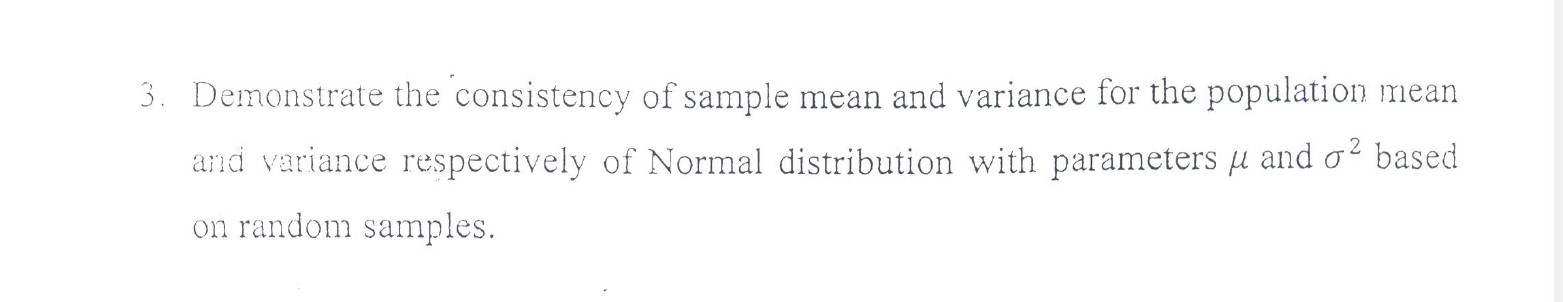

In [72]:
mu=4;s=2;eps=0.1;
N=[50,100,250,500,1000]
p1=[]
p2=[]
for i in range(0,(len(N))):
    x=np.random.normal(mu,s,(N[i],N[i]))
    T1=np.mean(x,axis=1)
    T2=np.var(x,axis=1)
    p1.append(np.mean(np.abs(T1-mu)<eps))
    p2.append(np.mean(np.abs(T2-s**2)<eps))
pd.DataFrame({"sample size":N,"est_prob1":p1,"est_prob2":p2})

,sample size,est_prob1,est_prob2
0,50,0.260,0.180
1,100,0.380,0.130
2,250,0.564,0.228
3,500,0.720,0.324
4,1000,0.902,0.431


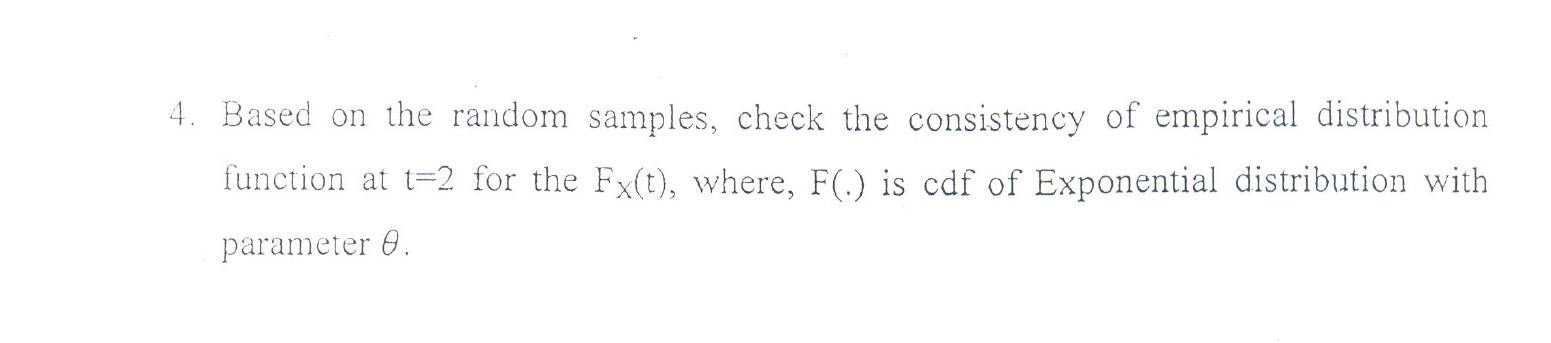

In [93]:
t=2;theta=3;eps=0.1
N=[50,100,250,500,1000]
f=1-np.exp(-1/3*2)
p1=[]
for i in range(0,(len(N))):
    x=np.random.exponential(3,(N[i],N[i]))
    T=np.mean(x<=t,axis=1)
    p1.append(np.mean(np.abs(T-f)<eps))
pd.DataFrame({'sample Size':N,"est_prob1":p1})
    

,sample Size,est_prob1
0,50,0.82
1,100,0.94
2,250,1.00
3,500,1.00
4,1000,1.00


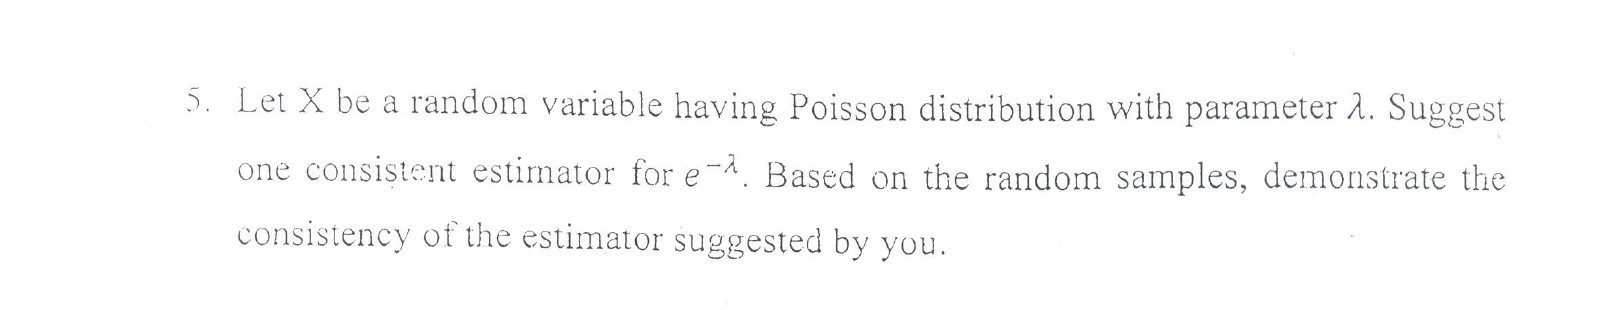

In [97]:
lam=4;eps=0.01;
N=[50,100,250,500,1000]
p1=[]
for i in range(0,len(N)):
    x=np.random.poisson(lam,(N[i],N[i]))
    xbar=np.mean(x,axis=1)
    T=np.exp(-xbar)
    M=np.exp(-lam)
    p1.append(np.mean(np.abs(T-M)<eps))
pd.DataFrame({'sample size':N,"est_prob":p1})

,sample size,est_prob
0,50,0.96
1,100,0.96
2,250,1.00
3,500,1.00
4,1000,1.00


# Practical 2

# Moment estimators and consistency

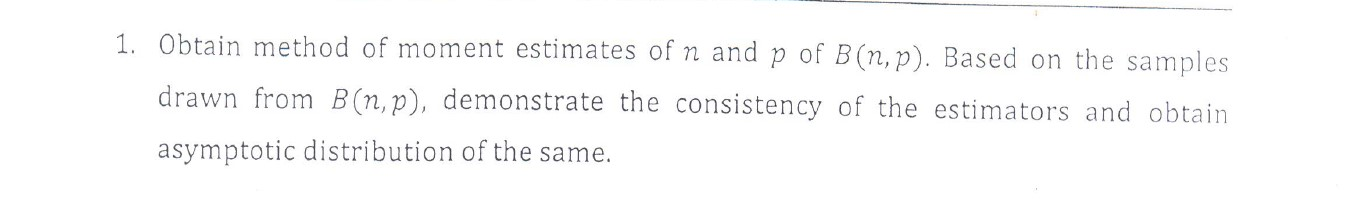

In [4]:
import statsmodels.api as sm

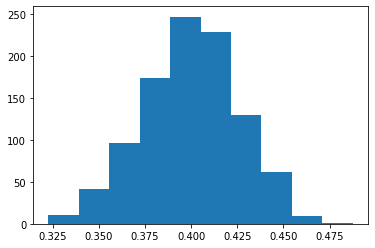

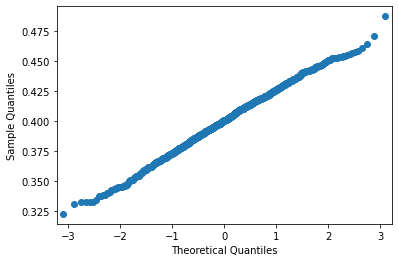

In [6]:
n=10;p=0.4;eps=0.1
N=[50,100,250,500,1000]
p1=[]
p2=[]
for i in range(0,len(N)):
    x=np.random.binomial(n,p,(N[i],N[i]))
    xbar=np.mean(x,axis=1)
    xvar=np.var(x,axis=1)
    phat=1-(xvar/xbar)
    p1.append(np.mean(np.abs(phat-p)<eps))
pd.DataFrame({"sample size":N,"est_p1":p1})
plt.hist(phat),sm.qqplot(phat)
plt.show()

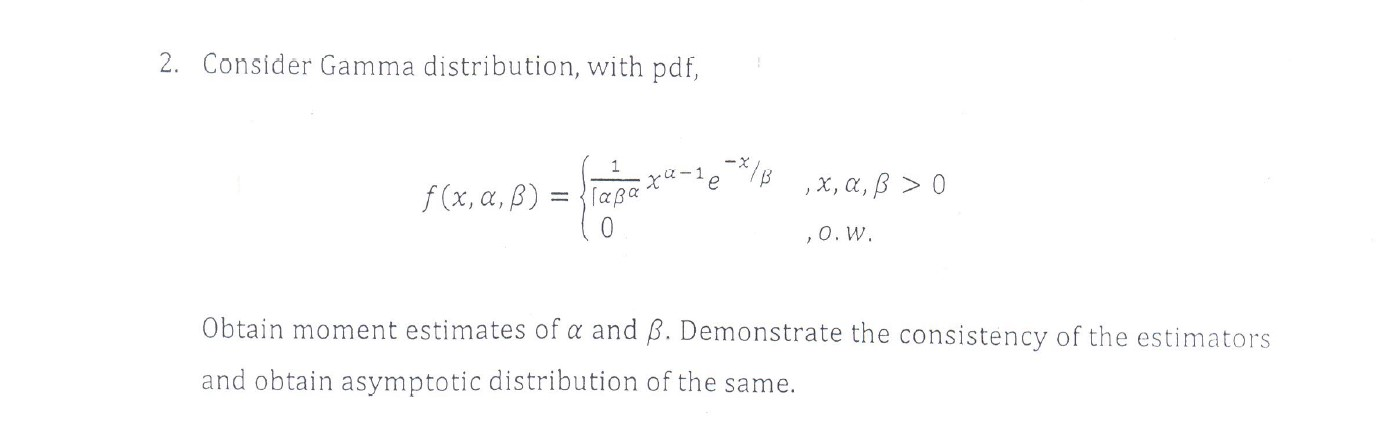

(array([ 10.,  40., 104., 141., 237., 214., 136.,  85.,  16.,  17.]), array([2.13936339, 2.21588158, 2.29239976, 2.36891795, 2.44543614,
       2.52195432, 2.59847251, 2.67499069, 2.75150888, 2.82802706,
       2.90454525]), <BarContainer object of 10 artists>) (array([ 16.,  41.,  99., 194., 227., 176., 123.,  84.,  28.,  12.]), array([1.01560745, 1.05344394, 1.09128043, 1.12911692, 1.16695341,
       1.2047899 , 1.24262638, 1.28046287, 1.31829936, 1.35613585,
       1.39397234]), <BarContainer object of 10 artists>)
Figure(432x288) Figure(432x288)


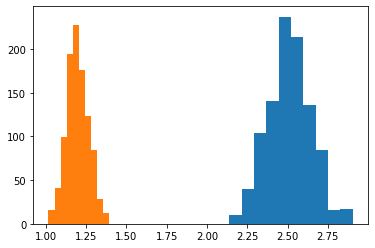

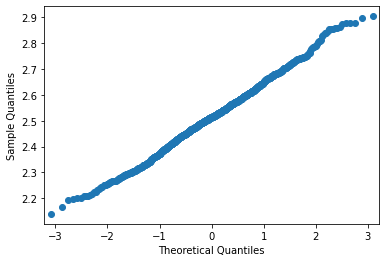

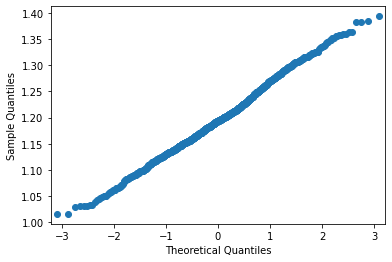

In [44]:
alpha=2.5;beta=1.2;eps=0.1;p1=[];p2=[]
N=[50,100,250,500,1000]
for i in range(0,len(N)):
    x=np.random.gamma(alpha,beta,(N[i],N[i]))
    x_bar=np.mean(x,axis=1)
    xvar=np.var(x,axis=1)
    alpha_hat=x_bar**2/xvar
    beta_hat=xvar/x_bar
    p1.append(np.mean(np.abs(alpha_hat-alpha)<eps))
    p2.append(np.mean(np.abs(beta_hat-beta)<eps))
pd.DataFrame({"sample size":N,"est_p1":p1,"est_p2":p2})
print(plt.hist(alpha_hat),plt.hist(beta_hat))
print(sm.qqplot(alpha_hat),sm.qqplot(beta_hat))

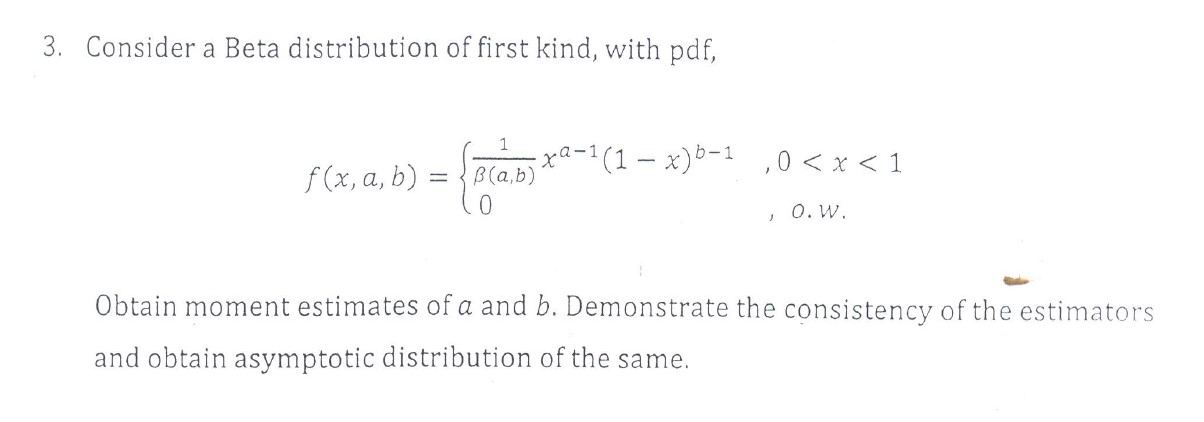

(array([  2.,  15.,  79., 198., 274., 246., 109.,  62.,  13.,   2.]), array([0.92810574, 0.96444444, 1.00078314, 1.03712185, 1.07346055,
       1.10979925, 1.14613795, 1.18247665, 1.21881536, 1.25515406,
       1.29149276]), <BarContainer object of 10 artists>) (array([ 10.,  24., 108., 203., 256., 196., 128.,  48.,  24.,   3.]), array([2.07289468, 2.1448685 , 2.21684233, 2.28881615, 2.36078997,
       2.43276379, 2.50473761, 2.57671144, 2.64868526, 2.72065908,
       2.7926329 ]), <BarContainer object of 10 artists>)
Figure(432x288) Figure(432x288)


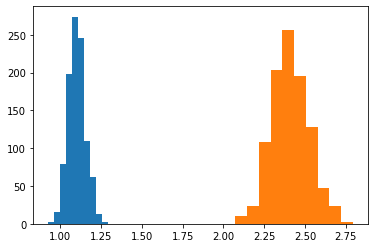

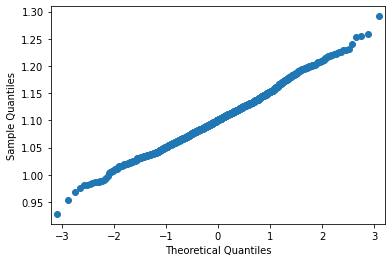

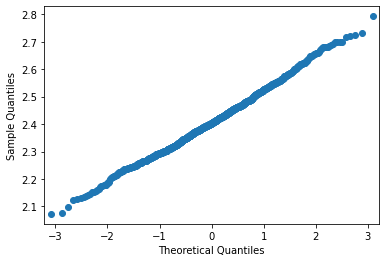

In [48]:
a=1.1;b=2.4;eps=0.1;p1=[];p2=[];
N=[50,100,200,500,1000]
for i in range(0,len(N)):
    x=np.random.beta(a,b,(N[i],N[i]))
    m1=np.mean(x,axis=1)
    xvar=np.var(x,axis=1)
    m2=xvar+m1**2
    a_hat=m1*(m1-m2)/(m2-m1**2)
    b_hat=(m2-m1)*((m1-1)/(m2-m1**2))
    p1.append(np.mean(np.abs(a_hat-a)<eps))
    p2.append(np.mean(np.abs(b_hat-a)<eps))
pd.DataFrame({"sample size":N,"est_p1":p1,"est_p2":p2})
print(plt.hist(a_hat),plt.hist(b_hat))
print(sm.qqplot(a_hat),sm.qqplot(b_hat))

# Practical 3

# consistency and CAN

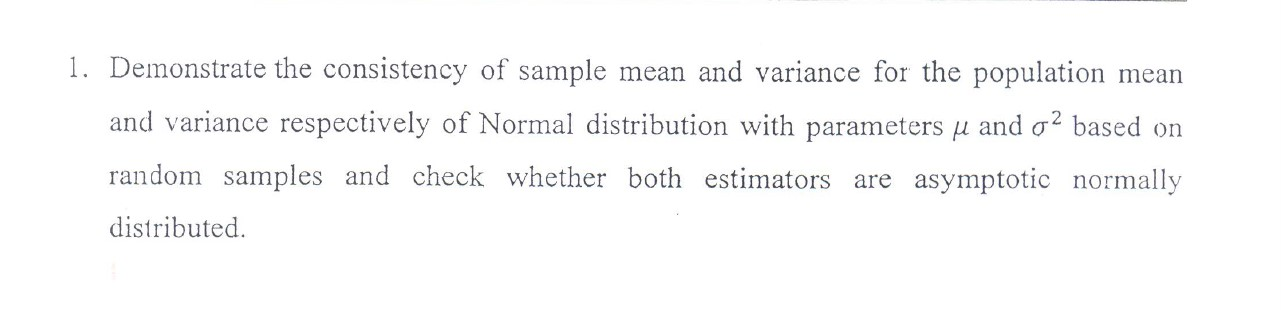

In [2]:
import statsmodels.api as sm

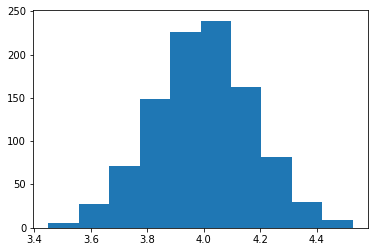

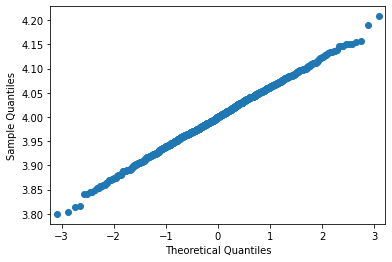

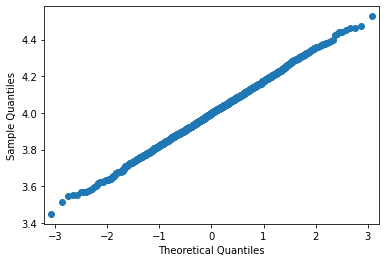

In [33]:
mu=4;s=2;eps=0.1;
N=[50,100,250,500,1000]
p1=[]
p2=[]
for i in range(0,(len(N))):
    x=np.random.normal(mu,s,(N[i],N[i]))
    T1=np.mean(x,axis=1)
    T2=np.var(x,axis=1)
    p1.append(np.mean(np.abs(T1-mu)<eps))
    p2.append(np.mean(np.abs(T2-s**2)<eps))
pd.DataFrame({"sample size":N,"est_prob1":p1,"est_prob2":p2})
plt.hist(T2)
sm.qqplot(T1)
sm.qqplot(T2)
plt.show()

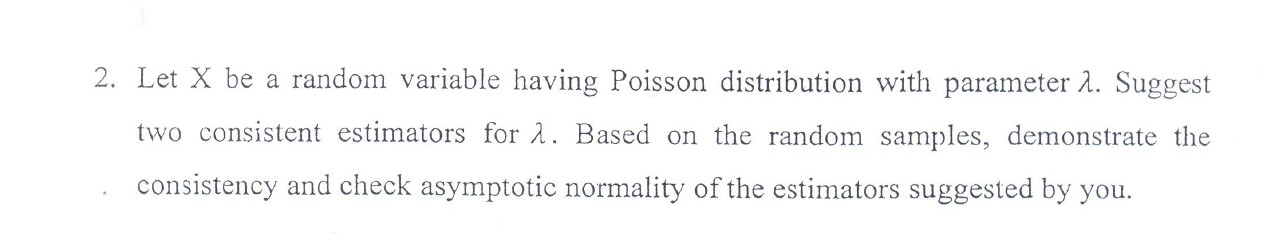

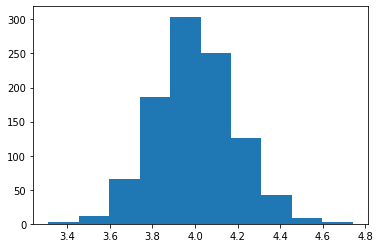

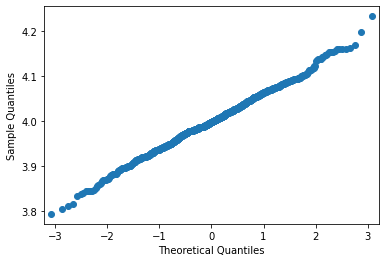

In [35]:
lam=4;eps=0.01;
N=[50,100,250,500,1000]
p1=[]
p2=[]
for i in range(0,len(N)):
    x=np.random.poisson(lam,(N[i],N[i]))
    T1=np.mean(x,axis=1)
    T2=np.var(x,axis=1)
    p1.append(np.mean(np.abs(T1-lam)<eps))
    p2.append(np.mean(np.abs(T2-lam)<eps))
pd.DataFrame({'sample size':N,"est_prob1":p1,"est_prob2":p2})
plt.hist(T2)
sm.qqplot(T1)
plt.show()